# DS-210: Programming for Data Science


# Lecture 8: Optimization and Linear Programming


## Optimization

* Traditional area of **Operations Research**


**Why study optimization?**

* Important when making business decision based on data

* Also at heart of many machine learning methods

  * $k$–means (previous lecture)
  
  * deep learning and neural networks

### Today: Linear Programming

### General setting

* a number of real variables: $x_1$, $x_2$, $\ldots$, $x_n$

* a number of linear constraints:

$$b_{1,1} x_1 + \cdots + b_{1,n} x_n \le d_1 $$

$$\vdots$$

$$b_{t,1} x_1 + \cdots + b_{t,n} x_n \le d_t $$

* Goal: maximize or minimize $c_1 x_1 + c_2 x_2 + \cdots + c_n x_n$


### Simple Example

* variables: $x$ and $y$

* linear constraints:
  $$x \ge 0$$

  $$y \ge 0$$
  
  $$5x+4y\le20$$
  
  $$3x + 5y \le 15$$



* **Goal:** maximize $x + y$

<div align="center"></div>

<div align="center"></div>

<div align="center"></div>

<div align="center"></div>

### Simple Example

* variables: $x$ and $y$

* linear constraints:
  $$x \ge 0$$
  $$y \ge 0$$
  $$5x+4y\le20$$
  $$3x + 5y \le 15$$

* **Goal:** maximize $x + y$

<div align="center"></div>

* Maximized for $(x,y) = (\frac{40}{13}, \frac{15}{13})$
* [Wolfram Alpha Solver](https://tinyurl.com/2rjtcz3n)
* [The simplex method](https://dl.acm.org/doi/pdf/10.1145/87252.88081)

## Example: get cars to dealerships cheaply

* Five dealerships with demands: `[20,40,10,25,10]`
* Three warehouses with inventory: `[25,45,40]`
* The cost of moving **one** car from warehouse `i` to dealership `j`: `cost[i][j]`

**Goal:** Satisfy all demands while paying as little as possible for moving cars

In [1]:
dealerships = [20,40,10,25,10]
warehouses = [25,45,40]

In [1]:
import numpy as np
# set costs to random between 1000 and 2000
cost = np.random.uniform(low=1000.0,high=2000.0,
                         size=(3,5))
print(cost)

[[1799.88437741 1986.39466784 1022.55412984 1719.33487242 1563.75542621]
 [1339.61587692 1213.73226621 1154.92905606 1077.6419957  1755.30754268]
 [1277.1901133  1518.48466663 1146.23926844 1653.67156959 1983.97462588]]


**Variables $x_{i,j}$:** correspond to the number of cars moved from warehouse $i$ to dealership $j$.

<div align="center">
<b>What constraints do we need?</b>
</div>

## Example: get cars to dealerships cheaply

Can't move negative numbers of cars:
$$x_{i,j} \ge 0$$

Each warehouse $i$ can't send more than its inventory:
$$\sum_{j=1}^5 x_{i,j} \le \mbox{warehouses}[i]$$

Demand of each dealership $j$ is satisfied:
$$\sum_{i=1}^3 x_{i,j} = \mbox{dealerships}[j]$$

**Goal:** minimize total cost $\sum_{i=1}^3\sum_{j=1}^5 x_{i,j} \cdot \mbox{cost}[i][j]$

## Solving linear programming with SciPy

[SciPy Linear Programming](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)

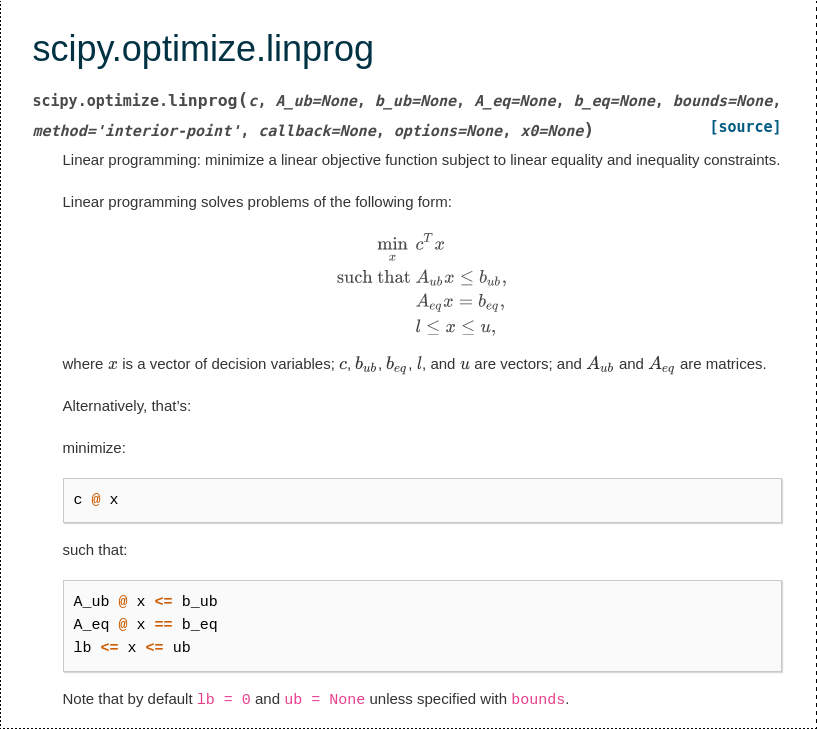


<br><br><br><br>

* Minimize $c * x$ such that
* $A\_ub * x <= b\_ub$
* $A\_eq * x <= b\_eq$
* $bounds = [l,u] $ with $l<=x<=y$

Notes:

* Make sure you understand the matrix multiplication notation in the docs

* Adjust your linear program to the required form:

  * Make constraints "less then" with variables on the left
  * Make minimization the goal (multiply by $-1$ if you are maximizing!)

## Applying SciPy to our problem

In [3]:
# convert cost to one dimensional vector
c = cost.ravel()
print(c)

[1202.41716241 1308.6152028  1200.9468811  1990.64461006 1123.98521842
 1937.33547483 1816.24815644 1765.20908974 1973.27804936 1729.0928792
 1215.97527448 1733.63675421 1013.52810442 1270.43500794 1490.48898112]


In [4]:
# Remember that
# demands = [20,40,10,25,10]
# inventory = [25,45,40]
# make sure not too much transported out of each warehouse
# Why is our matrix 3X15 instead of 3X5?
# Because we have 15 variables but only 5 at time contribute to how many cars are moving out of each warehouse
# The matrix has 3 rows with the 1s in each row signifying which variables contribute to that warehouse
zeros,ones = [0, 0, 0, 0, 0], [1, 1, 1, 1, 1]
A_ub = [
    ones + zeros + zeros,
    zeros + ones + zeros,
    zeros + zeros + ones
]
b_ub = warehouses
A_ub,b_ub

([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]],
 [25, 45, 40])

In [6]:
# make sure demands at dealerships are satisified
# Similarly here.  We have a 5x15 matrix because we have 5 dealerships and 15 variables
# The 1s in the row signify which variables contribute to that dealership
def dealearship(j):
    jth = [1 if k == j else 0 for k in range(5)]
    return jth + jth + jth
A_eq = [dealearship(j) for j in range(5)]
b_eq = dealerships
A_eq,b_eq

([[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
 [20, 40, 10, 25, 10])

In [7]:
# make sure variables are non-negative
# as we can not move a negative number of cars out of a warehouse.  Must be at least 0.
# (None means no upper or lower bound)
bounds = [(0,None) for i in range(15)]
bounds

[(0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None)]

In [8]:
from scipy.optimize import linprog
solution = linprog(c,A_ub,b_ub,A_eq,b_eq,bounds,method='revised simplex')
print("=============")
solution2 = linprog(c,A_ub,b_ub,A_eq,b_eq,bounds,method='highs')
print("status =",solution.status, "iters=", solution.nit, "cost=", solution.fun, "\nx=\n", solution.x.reshape(3,5))
print("=============")
print("status =",solution2.status, "iters=", solution2.nit, "cost=", solution2.fun, "\nx=\n", solution2.x.reshape(3,5))

status = 0 iters= 16 cost= 149902.0684931262 
x=
 [[15.  0.  0.  0. 10.]
 [ 0. 40.  0.  0.  0.]
 [ 5.  0. 10. 25.  0.]]
status = 0 iters= 11 cost= 149902.0684931262 
x=
 [[15. -0.  0.  0. 10.]
 [ 0. 40.  0.  0.  0.]
 [ 5.  0. 10. 25.  0.]]


/var/folders/g0/grh98kn55sv7hc3src6dygvm0000gn/T/ipykernel_3214/2464744927.py:2: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  solution = linprog(c,A_ub,b_ub,A_eq,b_eq,bounds,method='revised simplex')


## Various optimization options

### Parameter `method`

* Simplex (`simplex`, `revised simplex`)

  - deprecated and will be removed going forward
  
* Interior point (`interior-point`)

   - faster for some inputs, also deprecated

* `highs, highs-ds, highs-ipm` are more efficient C++ implementation of the above.  `highs` is the default.



## Digression: How to check if something is zero?

With finite–precision computer arithmetic, you should check if $|x| < 10^{-6}$ or another sufficiently small number

In [9]:
result = 0.3 - 3 * 0.1


In [10]:
print("Test 1:", result == 0.0)


Test 1: False


In [11]:

# better test
def is_zero(x):
    return x < 1e-6 and x > -1e-6
print("Test 2:", is_zero(result))


Test 2: True


## Floating Point Representation in Computers
![](floating_point.png)

## Convex vs. non-convex optimization

<div align="center"></div>
<div align="center">Convex</div>

<div align="center"></div>
<div align="center">Non-convex</div>

* Linear programming is an example of convex optimization
* Convex optimization is easier from a computational perspective